In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
defect_df = pd.read_csv("data/10_product_defect_status.csv")
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   production_line            3000 non-null   object 
 1   shift                      3000 non-null   object 
 2   operator_experience_years  2913 non-null   float64
 3   processing_time_min        2914 non-null   float64
 4   temperature                3000 non-null   float64
 5   humidity                   3000 non-null   float64
 6   measurement_A              3000 non-null   float64
 7   measurement_B              3000 non-null   float64
 8   measurement_C              3000 non-null   float64
 9   defect_status              3000 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 234.5+ KB


<Axes: xlabel='defect_status', ylabel='temperature'>

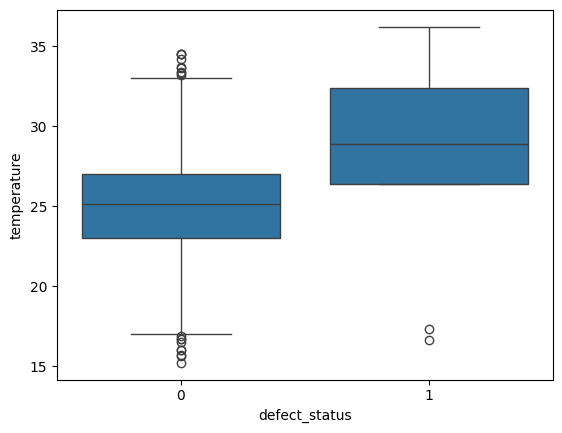

In [4]:
sns.boxplot(data=defect_df, x='defect_status', y='temperature')

In [5]:
defect_df

,production_line,shift,operator_experience_years,processing_time_min,temperature,humidity,measurement_A,measurement_B,measurement_C,defect_status
0,Line-1,주간,11.0,28.2,30.9,49.0,102.31,172.37,46.22,0
1,Line-3,야간,2.0,25.0,24.6,57.3,94.46,162.90,52.36,0
2,Line-1,야간,7.0,18.4,25.5,46.4,91.87,187.95,45.75,0
3,Line-1,주간,14.0,30.3,28.2,32.0,107.93,204.50,52.99,0
4,Line-3,주간,5.0,23.6,27.3,61.7,111.14,183.81,46.28,0
...,...,...,...,...,...,...,...,...,...,...
2995,Line-3,주간,7.0,33.9,23.9,51.9,92.62,194.40,46.31,0
2996,Line-3,주간,3.0,28.9,23.8,42.6,105.95,173.97,56.82,0
2997,Line-3,야간,0.0,23.4,24.1,60.8,114.55,193.28,49.75,0
2998,Line-1,주간,2.0,29.1,26.4,63.5,97.76,212.11,42.23,0


In [6]:
crosstab_ratio = pd.crosstab(defect_df['production_line'], defect_df['defect_status'], normalize='index')
crosstab_ratio

defect_status,0,1
production_line,,
Line-1,1.000000,0.000000
Line-2,1.000000,0.000000
Line-3,0.990239,0.009761


In [7]:
defect_df.groupby('shift')[['measurement_A','measurement_B','measurement_C']].mean()

,measurement_A,measurement_B,measurement_C
shift,,,
야간,99.864751,198.970915,49.917666
주간,100.167378,199.028558,50.044495


In [12]:
defect_pre = defect_df.copy()
med = defect_pre['operator_experience_years'].median()
defect_pre['operator_experience_years'].fillna(med, inplace=True)

men = defect_pre['processing_time_min'].mean()
defect_pre['processing_time_min'].fillna(men, inplace=True)

defect_pre.isnull().sum()

production_line              0
shift                        0
operator_experience_years    0
processing_time_min          0
temperature                  0
humidity                     0
measurement_A                0
measurement_B                0
measurement_C                0
defect_status                0
dtype: int64

In [13]:
defect_pre = pd.get_dummies(defect_pre, columns=['production_line'])

defect_pre['shift'] = defect_pre['shift'].map({'주간':0, '야간':1})

defect_pre.head()

,shift,operator_experience_years,processing_time_min,temperature,humidity,measurement_A,measurement_B,measurement_C,defect_status,production_line_Line-1,production_line_Line-2,production_line_Line-3
0,0,11.0,28.2,30.9,49.0,102.31,172.37,46.22,0,True,False,False
1,1,2.0,25.0,24.6,57.3,94.46,162.90,52.36,0,False,False,True
2,1,7.0,18.4,25.5,46.4,91.87,187.95,45.75,0,True,False,False
3,0,14.0,30.3,28.2,32.0,107.93,204.50,52.99,0,True,False,False
4,0,5.0,23.6,27.3,61.7,111.14,183.81,46.28,0,False,False,True
